In [404]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [175]:
!conda install catboost -y


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aayus\anaconda3

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       hc68a040_5         2.3 MB
    catboost-1.2.3             |  py312haa95532_0        53.9 MB
    font-ttf-dejavu-sans-mono-2.37|       hd3eb1b0_0         335 KB
    font-ttf-inconsolata-2.001 |       hcb22688_0          83 KB
    font-ttf-source-code-pro-2.030|       hd3eb1b0_0         654 KB
    font-ttf-ubuntu-0.83       |       h8b1ccd4_0         1.5 MB
    fontconfig-2.14.1          |       h9c4af85_2         198 KB
    fonts-anaconda-1           |       h8fa9717_0           3 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0           5 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    geto

In [406]:
# Load data
file_path = 'listings.csv'
data = pd.read_csv(file_path)

In [407]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


In [410]:
# Step 1: Data Preprocessing
# Clean and transform the amenities column
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Calculate "high booking rate" as a binary target (availability_30 < 15 considered high booking rate)
data['high_booking_rate'] = data['availability_30'].apply(lambda x: 1 if x < 15 else 0)

# Flatten amenities list for analysis
flat_amenities = [amenity for sublist in data['amenities'] for amenity in sublist]

# Count the most common amenities
top_amenities = pd.Series(flat_amenities).value_counts().head(20)
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,high_booking_rate
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,f,1,0,1,0,NaN,0
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.67,4.67,NaN,t,2,0,2,0,0.21,1
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,f,3,2,1,0,NaN,0
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,f,5,5,0,0,NaN,0
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,f,3,3,0,0,NaN,1


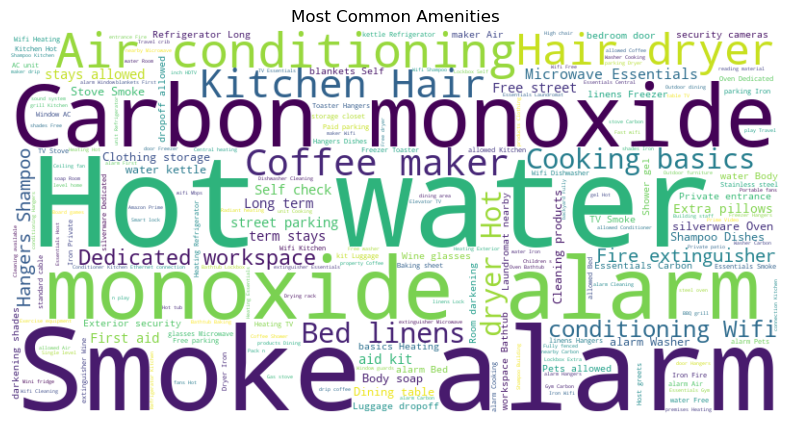

In [231]:
# Step 2: Visualize Most Common Amenities
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flat_amenities))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Amenities')
plt.show()



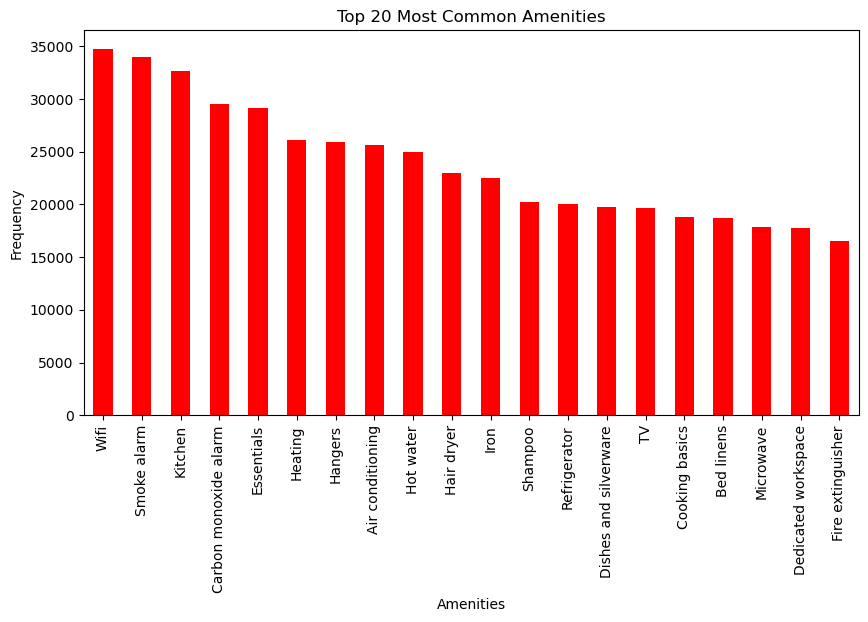

In [236]:
# Bar Chart
plt.figure(figsize=(10, 5))
top_amenities.plot(kind='bar', color="red")
plt.title('Top 20 Most Common Amenities')
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [329]:
# Step 3: Prepare Data for Modeling
# Transform amenities into a feature matrix using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
amenities_matrix = vectorizer.fit_transform(data['amenities'])

# Combine amenities matrix with high booking rate target
X = amenities_matrix
y = data['high_booking_rate']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\aayus\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [331]:
# Step 4: Train Classification Model
# Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [332]:
# Step 5: Evaluate Model
# Predictions
y_pred = model.predict(X_test)
y_prob_rf = model.predict_proba(X_test)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7822612864562525

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.33      0.45      2012
           1       0.79      0.95      0.86      5497

    accuracy                           0.78      7509
   macro avg       0.75      0.64      0.66      7509
weighted avg       0.77      0.78      0.75      7509



In [337]:
#Logistic regression without feature selection and one-hot encoding
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Transform amenities into a feature matrix using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
amenities_matrix = vectorizer.fit_transform(data['amenities'])

# Step 2: Combine amenities matrix with high booking rate target
X = amenities_matrix
y = data['high_booking_rate']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = logistic_model.predict(X_test)
y_prob_lr = logistic_model.predict_proba(X_test)



# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\aayus\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7509655080569982

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.30      0.39      2012
           1       0.78      0.92      0.84      5497

    accuracy                           0.75      7509
   macro avg       0.67      0.61      0.62      7509
weighted avg       0.72      0.75      0.72      7509



In [339]:
#Gradient boosted for same 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Step 1: Transform amenities into a feature matrix using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
amenities_matrix = vectorizer.fit_transform(data['amenities'])

# Step 2: Combine amenities matrix with high booking rate target
X = amenities_matrix
y = data['high_booking_rate']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Gradient Boosted Model (XGBoost)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\aayus\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\aayus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:45] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7718737514982021

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.37      0.46      2012
           1       0.80      0.92      0.86      5497

    accuracy                           0.77      7509
   macro avg       0.71      0.64      0.66      7509
weighted avg       0.75      0.77      0.75      7509



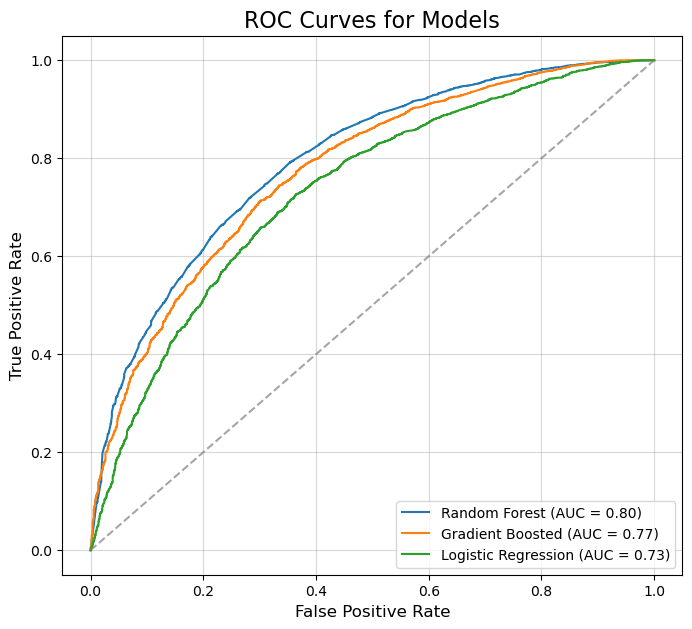

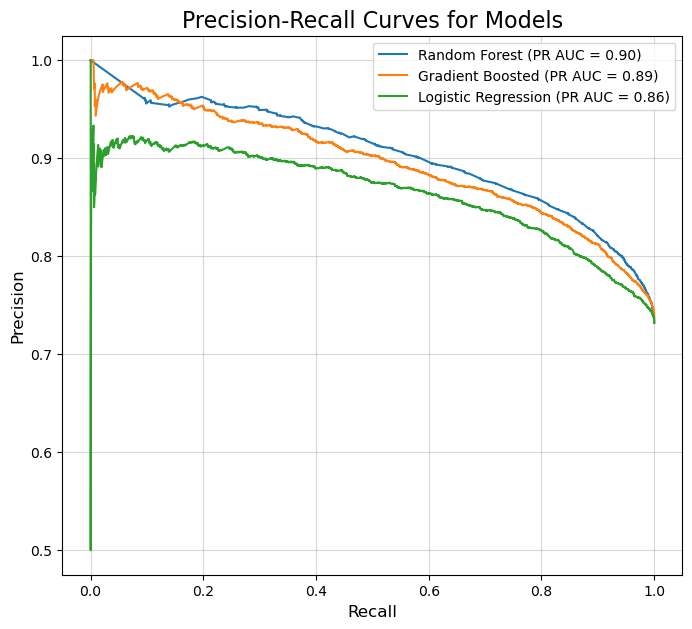

In [343]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

probabilities = [y_prob_rf, y_prob_xgb, y_prob_lr]
model_names = ['Random Forest', 'Gradient Boosted', 'Logistic Regression']

# 1. ROC Curves for all models
plt.figure(figsize=(8, 7))
for i, prob in enumerate(probabilities):
    fpr, tpr, _ = roc_curve(y_test, prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal line
plt.title("ROC Curves for Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# 2. Precision-Recall Curves for all models
plt.figure(figsize=(8, 7))
for i, prob in enumerate(probabilities):
    precision, recall, _ = precision_recall_curve(y_test, prob[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_names[i]} (PR AUC = {pr_auc:.2f})")

plt.title("Precision-Recall Curves for Models", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()


In [ ]:
#Feature selection based models

In [412]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Process amenities column
# Count total number of amenities
data['amenities_count'] = data['amenities'].apply(len)

# Define essential and luxury amenities categories
essential_amenities = {'Wifi', 'Heating', 'Kitchen', 'Air conditioning', 'TV'}
luxury_amenities = {'Pool', 'Hot tub', 'Gym', 'Spa', 'Fireplace'}

# Add binary features for essential and luxury amenities
data['has_essential_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in essential_amenities for amenity in x))
)
data['has_luxury_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in luxury_amenities for amenity in x))
)

# Step 2: One-hot encode 'room_type', excluding 'Hotel room'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
room_type_encoded = onehot_encoder.fit_transform(data[['room_type']])
room_type_columns = [f"room_type_{col}" for col in onehot_encoder.categories_[0]]

# Create a DataFrame for the one-hot encoded data
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=data.index)

# Remove the 'Hotel room' column from one-hot encoded data
if "room_type_Hotel room" in room_type_df.columns:
    room_type_df = room_type_df.drop(columns=["room_type_Hotel room"])

# Concatenate the filtered one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, room_type_df], axis=1)

# Step 3: Define features excluding 'Hotel room'
features = [
    'amenities_count',
    'has_essential_amenities',
    'has_luxury_amenities',
    *room_type_df.columns,  # Only the remaining room types are included
]
X = data[features]
y = data['high_booking_rate']


In [365]:
# Count rows before removing null values in 'room_type'
rows_before = data.shape[0]

# Remove rows where 'room_type' is null
data = data[data['room_type'].notnull()]

# Count rows after removing null values in 'room_type'
rows_after = data.shape[0]

# Print row counts
print(f"Rows before removing null values in 'room_type': {rows_before}")
print(f"Rows after removing null values in 'room_type': {rows_after}")

# Step 1: Process amenities column
# Count total number of amenities
data['amenities_count'] = data['amenities'].apply(len)

# Define essential and luxury amenities categories
essential_amenities = {'Wifi', 'Heating', 'Kitchen', 'Air conditioning', 'TV'}
luxury_amenities = {'Pool', 'Hot tub', 'Gym', 'Spa', 'Fireplace'}

# Add binary features for essential and luxury amenities
data['has_essential_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in essential_amenities for amenity in x))
)
data['has_luxury_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in luxury_amenities for amenity in x))
)

# Step 2: One-hot encode 'room_type', excluding 'Hotel room'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
room_type_encoded = onehot_encoder.fit_transform(data[['room_type']])
room_type_columns = [f"room_type_{col}" for col in onehot_encoder.categories_[0]]

# Create a DataFrame for the one-hot encoded data
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=data.index)

# Remove the 'Hotel room' column from one-hot encoded data
if "room_type_Hotel room" in room_type_df.columns:
    room_type_df = room_type_df.drop(columns=["room_type_Hotel room"])

# Concatenate the filtered one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, room_type_df], axis=1)

# Step 3: Define features excluding 'Hotel room'
features = [
    'amenities_count',
    'has_essential_amenities',
    'has_luxury_amenities',
    *room_type_df.columns,  # Only the remaining room types are included
]
X = data[features]
y = data['high_booking_rate']

print("Processed data ready for modeling.")


Rows before removing null values in 'room_type': 37541
Rows after removing null values in 'room_type': 37541
Processed data ready for modeling.


In [367]:
# Step 3: Model Training
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [369]:
# Step 4: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7365827673458516

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.12      0.20      2012
           1       0.75      0.96      0.84      5497

    accuracy                           0.74      7509
   macro avg       0.64      0.54      0.52      7509
weighted avg       0.69      0.74      0.67      7509



In [293]:
print("Columns in X_train:", X_train.columns)
print("Features list:", features)


Columns in X_train: Index(['amenities_count', 'has_essential_amenities', 'has_luxury_amenities',
       'room_type_Entire home/apt', 'room_type_Entire home/apt',
       'room_type_Entire home/apt', 'room_type_Entire home/apt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Private room', 'room_type_Private room',
       'room_type_Private room', 'room_type_Private room',
       'room_type_Shared room', 'room_type_Shared room',
       'room_type_Shared room', 'room_type_Shared room',
       'room_type_Shared room'],
      dtype='object')
Features list: ['amenities_count', 'has_essential_amenities', 'has_luxury_amenities', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']


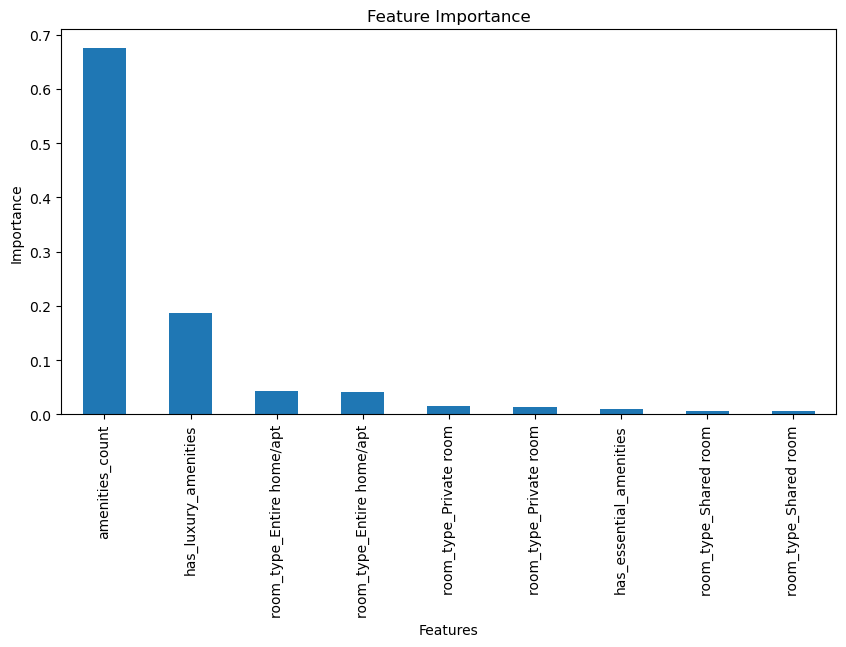

In [371]:
# Ensure features match the columns in X_train
features = X_train.columns.tolist()

# Extract and visualize feature importance
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=features)
top_features = feature_importances.nlargest(len(features))

# Bar Chart for Feature Importance
plt.figure(figsize=(10, 5))
top_features.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


In [373]:
from imblearn.over_sampling import SMOTE

In [391]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Process amenities column
# Count total number of amenities
data['amenities_count'] = data['amenities'].apply(len)

# Define essential and luxury amenities categories
essential_amenities = {'Wifi', 'Heating', 'Kitchen', 'Air conditioning', 'TV'}
luxury_amenities = {'Pool', 'Hot tub', 'Gym', 'Spa', 'Fireplace'}

# Add binary features for essential and luxury amenities
data['has_essential_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in essential_amenities for amenity in x))
)
data['has_luxury_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in luxury_amenities for amenity in x))
)

# Handle missing values in 'room_type' by filling with 'Unknown'
data['room_type'] = data['room_type'].fillna('Unknown')

# Step 2: One-hot encode 'room_type', excluding 'Hotel room'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
room_type_encoded = onehot_encoder.fit_transform(data[['room_type']])
room_type_columns = [f"room_type_{col}" for col in onehot_encoder.categories_[0]]

# Create a DataFrame for the one-hot encoded data
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=data.index)

# Remove the 'Hotel room' column from one-hot encoded data
if "room_type_Hotel room" in room_type_df.columns:
    room_type_df = room_type_df.drop(columns=["room_type_Hotel room"])

# Concatenate the filtered one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, room_type_df], axis=1)

# Step 3: Define features excluding 'Hotel room'
features = [
    'amenities_count',
    'has_essential_amenities',
    'has_luxury_amenities',
    *room_type_df.columns,  # Only the remaining room types are included
]
X = data[features]
y = data['high_booking_rate']


In [379]:
# Step 3: Handle Class Imbalance Using SMOTE
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Train the Random Forest Classifier with Class Weights
# Create the Random Forest Classifier with class_weight='balanced'
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [380]:
# Step 5: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob_rf = model.predict_proba(X_test)
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6035424157677454

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.52      0.41      2021
           1       0.78      0.64      0.70      5488

    accuracy                           0.60      7509
   macro avg       0.56      0.58      0.56      7509
weighted avg       0.66      0.60      0.62      7509



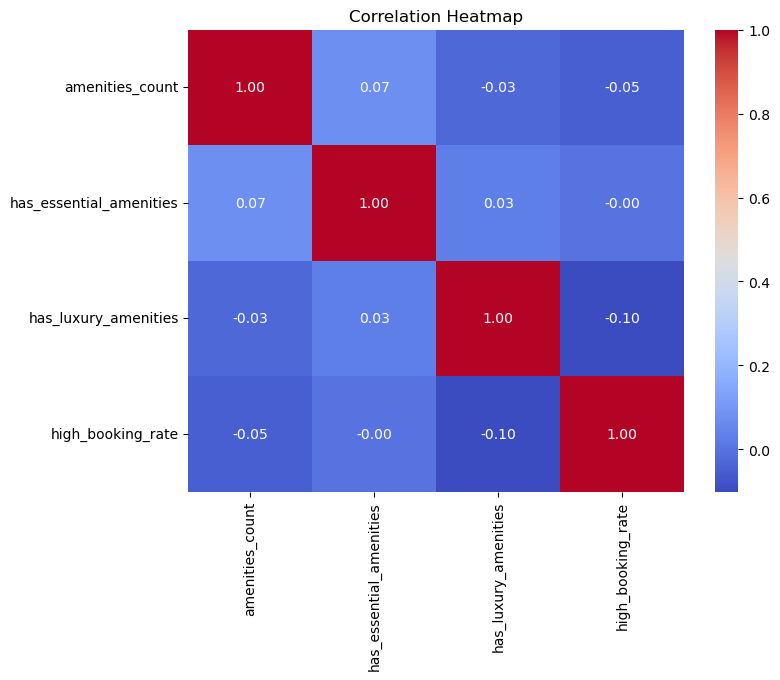

In [383]:
import seaborn as sns
# Step 2: Correlation Analysis for Numerical Features
# Correlation matrix
numerical_features = ['amenities_count', 'has_essential_amenities', 'has_luxury_amenities']
correlation_matrix = data[numerical_features + ['high_booking_rate']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [416]:
data['amenities_count'] = data['amenities'].apply(len)

# Define essential and luxury amenities categories
essential_amenities = {'Wifi', 'Heating', 'Kitchen', 'Air conditioning', 'TV'}
luxury_amenities = {'Pool', 'Hot tub', 'Gym', 'Spa', 'Fireplace'}

# Add binary features for essential and luxury amenities
data['has_essential_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in essential_amenities for amenity in x))
)
data['has_luxury_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in luxury_amenities for amenity in x))
)

# Step 2: One-hot encode 'room_type', excluding 'Hotel room'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
room_type_encoded = onehot_encoder.fit_transform(data[['room_type']])
room_type_columns = [f"room_type_{col}" for col in onehot_encoder.categories_[0]]

# Create a DataFrame for the one-hot encoded data
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=data.index)

# Remove the 'Hotel room' column from one-hot encoded data
if "room_type_Hotel room" in room_type_df.columns:
    room_type_df = room_type_df.drop(columns=["room_type_Hotel room"])

# Concatenate the filtered one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, room_type_df], axis=1)

# Step 3: Define features excluding 'Hotel room'
features = [
    'amenities_count',
    'has_essential_amenities',
    'has_luxury_amenities',
    *room_type_df.columns,  # Only the remaining room types are included
]
X = data[features]
y = data['high_booking_rate']

In [418]:
# Step 5: Train-Test Split and Handle Imbalance with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Standardize Features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train Logistic Regression Model
log_reg_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',  # Handles class imbalance
    solver='liblinear'        # Solver suitable for small datasets
)
log_reg_model.fit(X_train_resampled_scaled, y_train_resampled)

# Step 8: Evaluate the Model
y_pred_logreg = log_reg_model.predict(X_test_scaled)
y_prob_lr = log_reg_model.predict_proba(X_test)
print("\n--- Logistic Regression Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


--- Logistic Regression Model ---
Accuracy: 0.592489013184179

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40      2021
           1       0.77      0.63      0.69      5488

    accuracy                           0.59      7509
   macro avg       0.55      0.56      0.54      7509
weighted avg       0.65      0.59      0.61      7509



C:\Users\aayus\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [420]:
data['amenities_count'] = data['amenities'].apply(len)

# Define essential and luxury amenities categories
essential_amenities = {'Wifi', 'Heating', 'Kitchen', 'Air conditioning', 'TV'}
luxury_amenities = {'Pool', 'Hot tub', 'Gym', 'Spa', 'Fireplace'}

# Add binary features for essential and luxury amenities
data['has_essential_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in essential_amenities for amenity in x))
)
data['has_luxury_amenities'] = data['amenities'].apply(
    lambda x: int(any(amenity in luxury_amenities for amenity in x))
)

# Step 2: One-hot encode 'room_type', excluding 'Hotel room'
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
room_type_encoded = onehot_encoder.fit_transform(data[['room_type']])
room_type_columns = [f"room_type_{col}" for col in onehot_encoder.categories_[0]]

# Create a DataFrame for the one-hot encoded data
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=data.index)

# Remove the 'Hotel room' column from one-hot encoded data
if "room_type_Hotel room" in room_type_df.columns:
    room_type_df = room_type_df.drop(columns=["room_type_Hotel room"])

# Concatenate the filtered one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, room_type_df], axis=1)

# Step 3: Define features excluding 'Hotel room'
features = [
    'amenities_count',
    'has_essential_amenities',
    'has_luxury_amenities',
    *room_type_df.columns,  # Only the remaining room types are included
]
X = data[features]
y = data['high_booking_rate']

In [430]:
import lightgbm as lgb
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Standardize Features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create LightGBM datasets
lgb_train = lgb.Dataset(X_train_resampled_scaled, label=y_train_resampled)
lgb_test = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)

# Step 5: Define LightGBM Parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'is_unbalance': True,  # Automatically handle class imbalance
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
}

# Step 6: Train the LightGBM Model with Early Stopping
callbacks = [lgb.early_stopping(stopping_rounds=10)]  # Early stopping to avoid overfitting
lgb_model = lgb.train(
    params=lgb_params,
    train_set=lgb_train,
    num_boost_round=500,
    valid_sets=[lgb_test],
    callbacks=callbacks
)

# Step 7: Predict on the Test Set
y_pred_lgb = (lgb_model.predict(X_test_scaled) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 10: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgb)

# Step 8: Evaluate the Model
print("\n--- LightGBM Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.664312

--- LightGBM Model ---
Accuracy: 0.574643760820349

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.57      0.42      2021
           1       0.79      0.57      0.66      5488

    accuracy                           0.57      7509
   macro avg       0.56      0.57      0.54      7509
weighted avg       0.66      0.57      0.60      7509



In [ ]:
probabilities = [y_prob_rf, y_prob_lgb, y_prob_lr]
model_names = ['Random Forest', 'Gradient Boosted', 'Logistic Regression']

# 1. ROC Curves for all models
plt.figure(figsize=(8, 7))
for i, prob in enumerate(probabilities):
    fpr, tpr, _ = roc_curve(y_test, prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal line
plt.title("ROC Curves for Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# 2. Precision-Recall Curves for all models
plt.figure(figsize=(8, 7))
for i, prob in enumerate(probabilities):
    precision, recall, _ = precision_recall_curve(y_test, prob[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_names[i]} (PR AUC = {pr_auc:.2f})")

plt.title("Precision-Recall Curves for Models", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

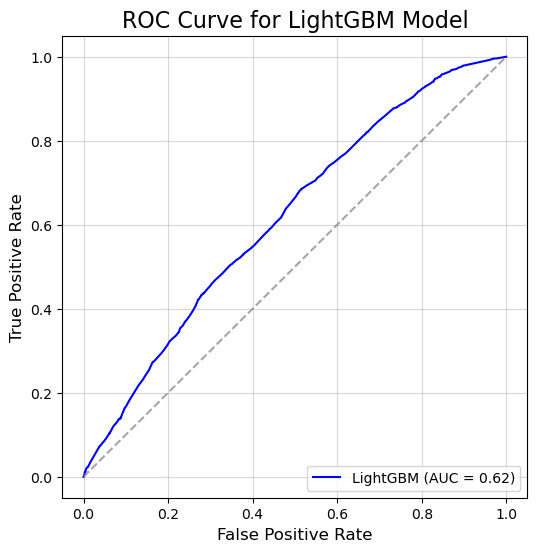

LightGBM ROC AUC: 0.62


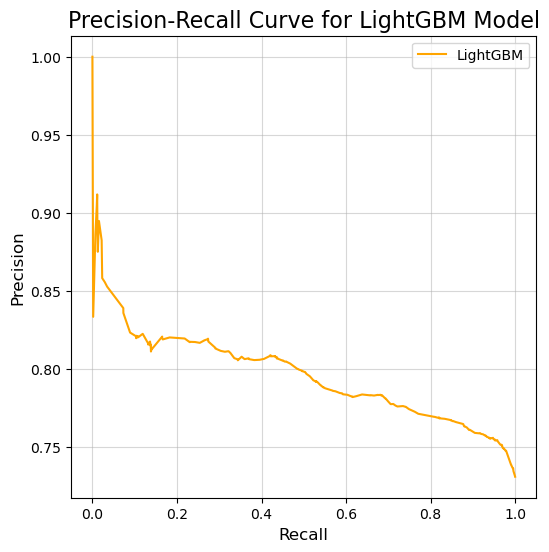

LightGBM Precision-Recall AUC: 0.80


In [440]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Step 9: Get probabilities for the positive class
y_prob_lgb = lgb_model.predict(X_test_scaled)  # Predict probabilities for the positive class

# Step 10: Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_lgb)  # Compute FPR and TPR
roc_auc = auc(fpr, tpr)  # Compute AUC

# Step 11: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal line for random guessing
plt.title("ROC Curve for LightGBM Model", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# Print the AUC for reference
print(f"LightGBM ROC AUC: {roc_auc:.2f}")

# Step 12: Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_lgb)  # Compute Precision and Recall

# Step 13: Plot the Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='orange', label="LightGBM")
plt.title("Precision-Recall Curve for LightGBM Model", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# (Optional) If you want the PR AUC, you can compute it:
pr_auc = auc(recall, precision)
print(f"LightGBM Precision-Recall AUC: {pr_auc:.2f}")



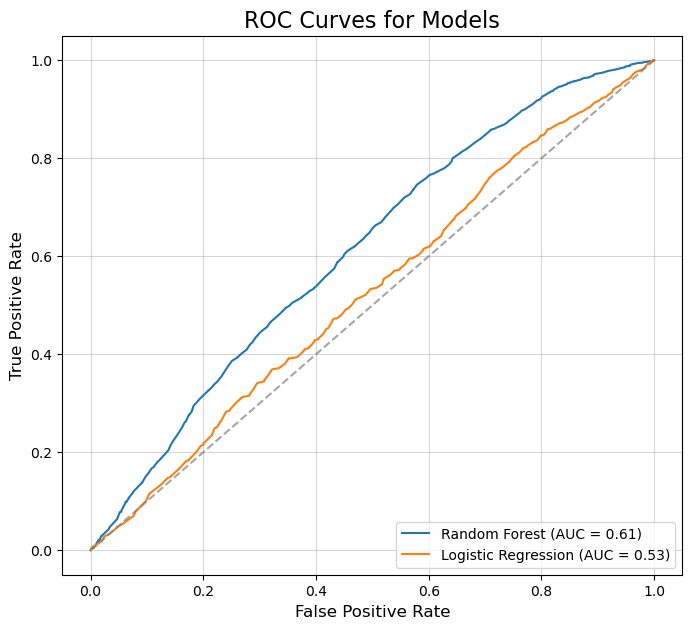

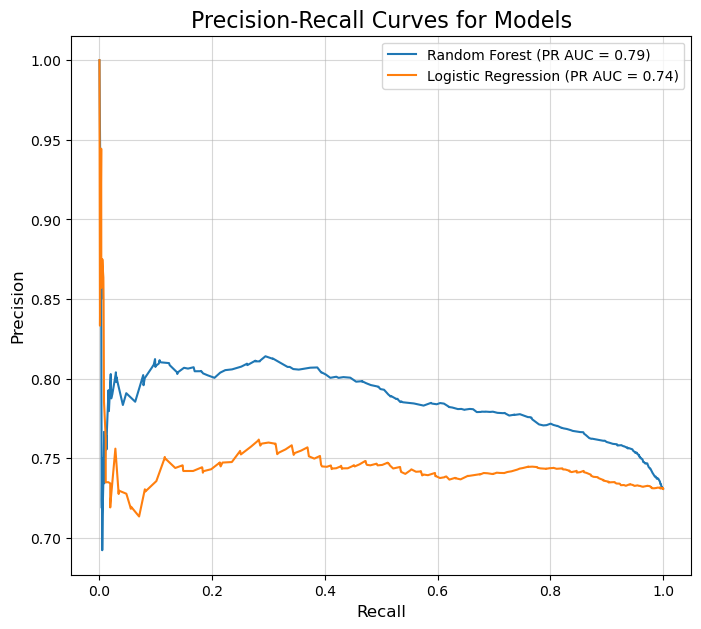

In [438]:
probabilities = [y_prob_rf,  y_prob_lr]
model_names = ['Random Forest', 'Logistic Regression']

# 1. ROC Curves for all models
plt.figure(figsize=(8, 7))
for i, prob in enumerate(probabilities):
    fpr, tpr, _ = roc_curve(y_test, prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal line
plt.title("ROC Curves for Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# 2. Precision-Recall Curves for all models
plt.figure(figsize=(8, 7))
for i, prob in enumerate(probabilities):
    precision, recall, _ = precision_recall_curve(y_test, prob[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_names[i]} (PR AUC = {pr_auc:.2f})")

plt.title("Precision-Recall Curves for Models", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

In [442]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Train-Test Split
# Split the data into training and testing sets (stratify ensures class balance in split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Handle Class Imbalance with SMOTE
# Use SMOTE to balance the training data by generating synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Standardize Features
# Standardize features to have zero mean and unit variance (necessary for Neural Networks)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define and Train MLP Classifier
# Create an MLPClassifier with two hidden layers of sizes 100 and 50, using ReLU and Adam optimizer
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons respectively
    activation='relu',            # Activation function
    solver='adam',                # Optimizer
    alpha=0.001,                  # L2 regularization
    max_iter=300,                 # Maximum number of iterations
    random_state=42               # Random state for reproducibility
)

# Train the model on the resampled and scaled training data
mlp_model.fit(X_train_resampled_scaled, y_train_resampled)

# Step 5: Make Predictions
# Predict the labels for the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Step 6: Evaluate the Model
# Print the accuracy and classification report
print("\n--- MLP Classifier Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))



--- MLP Classifier Model ---
Accuracy: 0.5643893993874017

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.60      0.43      2021
           1       0.79      0.55      0.65      5488

    accuracy                           0.56      7509
   macro avg       0.56      0.58      0.54      7509
weighted avg       0.67      0.56      0.59      7509



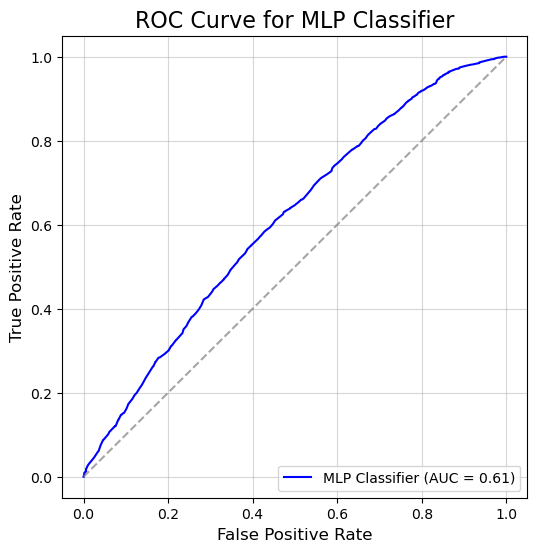

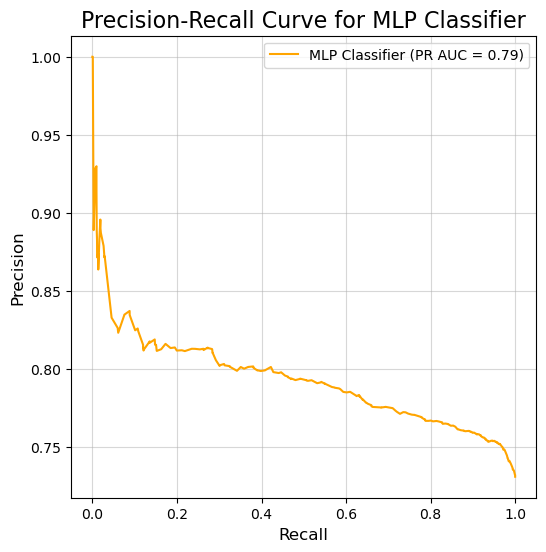

MLP Classifier ROC AUC: 0.61
MLP Classifier Precision-Recall AUC: 0.79


In [446]:
# Step 1: Compute probabilities for the positive class (High Booking Rate)
y_prob_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]  # Extract probabilities for class 1 (positive)

# Step 2: Compute ROC Curve and AUC
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)  # Compute False Positive Rate and True Positive Rate
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)  # Compute Area Under the Curve for ROC

# Step 3: Plot the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', label=f"MLP Classifier (AUC = {roc_auc_mlp:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal line for random guessing
plt.title("ROC Curve for MLP Classifier", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# Step 4: Compute Precision-Recall Curve and AUC
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_prob_mlp)  # Compute Precision and Recall
pr_auc_mlp = auc(recall_mlp, precision_mlp)  # Compute Area Under the Curve for Precision-Recall

# Step 5: Plot the Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall_mlp, precision_mlp, color='orange', label=f"MLP Classifier (PR AUC = {pr_auc_mlp:.2f})")
plt.title("Precision-Recall Curve for MLP Classifier", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# Print AUC metrics
print(f"MLP Classifier ROC AUC: {roc_auc_mlp:.2f}")
print(f"MLP Classifier Precision-Recall AUC: {pr_auc_mlp:.2f}")
